# Decision Trees

### 1) Define business goal 

Which of the TITANIC passnegers has survived


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


### 2) Get data

In [2]:
df = pd.read_csv('data/train.csv', sep=",")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#df = df[df['Species'] != 'Chinstrap']

  ### Select columns for y and X

In [4]:
# independent variables, input features, a matrix
X = df

# dependent variable, target variable, a vector
y = df['Survived']

### 3) Train-test-split


In [5]:
# Split the DataFrame into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [6]:
X_train.shape, X_test.shape

((712, 12), (179, 12))

In [7]:
X_train = X_train.copy()
X_test = X_test.copy()

In [8]:
X_train['Title'] = X_train['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
X_test['Title'] = X_test['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

def title_extractor(name):
       return name.split(',')[1].split('.')[0].strip()
    
    a = name.split(',')
    b = a[1].split('.')
    c = b[0].strip()
    return c

X_train['Title'] = X_train['Name'].apply(title_extractor)
X_test['Title'] = X_test['Name'].apply(title_extractor)

In [9]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,Mr
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,Mr
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,Mr
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,Mr
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,Miss
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,Mr
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,Mr
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,Miss


In [10]:
# standardize the titles
standardized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

# map the standardized titles to the current titles 
X_train['Title'] = X_train['Title'].map(standardized_titles)
X_test['Title'] = X_test['Title'].map(standardized_titles)
# view value counts for the standardized titles
print(X_train['Title'].value_counts())

Mr         419
Miss       145
Mrs         98
Master      33
Officer     15
Royalty      2
Name: Title, dtype: int64


In [11]:
X_train['Sex'] = X_train['Sex'].replace({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].replace({'male': 0, 'female': 1})
X_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
331,332,0,1,"Partner, Mr. Austen",0,45.5,0,0,113043,28.500,C124,S,Mr
733,734,0,2,"Berriman, Mr. William John",0,23.0,0,0,28425,13.000,NaN,S,Mr
382,383,0,3,"Tikkanen, Mr. Juho",0,32.0,0,0,STON/O 2. 3101293,7.925,NaN,S,Mr


In [12]:
# group by Sex, Pclass, and Title 
grouped_train = X_train.groupby(['Sex','Pclass', 'Title'])  
grouped_test = X_test.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped_train['Age'].median()
grouped_test['Age'].median()

Sex  Pclass  Title  
0    1       Master     11.00
             Mr         42.00
             Royalty    40.00
     2       Master      0.83
             Mr         31.00
             Officer    25.00
     3       Master      9.00
             Mr         24.00
1    1       Miss       28.00
             Mrs        50.00
             Officer    49.00
     2       Miss       17.50
             Mrs        35.00
     3       Miss       15.00
             Mrs        38.50
Name: Age, dtype: float64

In [13]:
X_train['Age'] = grouped_train['Age'].apply(lambda x: x.fillna(x.median()))
X_test['Age'] = grouped_test['Age'].apply(lambda x: x.fillna(x.median()))
X_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
331,332,0,1,"Partner, Mr. Austen",0,45.5,0,0,113043,28.500,C124,S,Mr
733,734,0,2,"Berriman, Mr. William John",0,23.0,0,0,28425,13.000,NaN,S,Mr
382,383,0,3,"Tikkanen, Mr. Juho",0,32.0,0,0,STON/O 2. 3101293,7.925,NaN,S,Mr


In [14]:
X_train['Family_Size'] = X_train['Parch'] + X_train['SibSp'] + 1
X_test['Family_Size'] = X_test['Parch'] + X_test['SibSp'] + 1

In [15]:
X_train['Cabin'] = X_train['Cabin'].fillna('U')
X_test['Cabin'] = X_test['Cabin'].fillna('U')

In [16]:
X_train['Cabin'] = X_train['Cabin'].map(lambda x: x[0])
X_test['Cabin'] = X_test['Cabin'].map(lambda x: x[0])

In [17]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
331,332,0,1,"Partner, Mr. Austen",0,45.5,0,0,113043,28.5000,C,S,Mr,1
733,734,0,2,"Berriman, Mr. William John",0,23.0,0,0,28425,13.0000,U,S,Mr,1
382,383,0,3,"Tikkanen, Mr. Juho",0,32.0,0,0,STON/O 2. 3101293,7.9250,U,S,Mr,1
704,705,0,3,"Hansen, Mr. Henrik Juul",0,26.0,1,0,350025,7.8542,U,S,Mr,2
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",1,6.0,4,2,347082,31.2750,U,S,Miss,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",1,21.0,0,0,343120,7.6500,U,S,Miss,1
270,271,0,1,"Cairns, Mr. Alexander",0,38.5,0,0,113798,31.0000,U,S,Mr,1
860,861,0,3,"Hansen, Mr. Claus Peter",0,41.0,2,0,350026,14.1083,U,S,Mr,3
435,436,1,1,"Carter, Miss. Lucile Polk",1,14.0,1,2,113760,120.0000,B,S,Miss,4


In [18]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [20]:
pipe_1 = make_pipeline(
    (SimpleImputer(missing_values = np.NaN, strategy='most_frequent')),
    (OneHotEncoder(sparse=False, handle_unknown = 'ignore'))
)

In [21]:
transformer = make_column_transformer(
    # (preprocessing, [list of column names])
    (pipe_1, ['Embarked']),
    (OneHotEncoder(sparse=False, handle_unknown = 'ignore'),['Cabin', 'Name', 'Title', 'Ticket']),
    (StandardScaler(), ['Fare','Pclass', 'SibSp', 'Parch','Age', 'Family_Size', 'PassengerId']),
    (KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile'), ['Age'])
#   ('passthrough', ['<Column Name>'])
)

In [22]:
# use the column transformer to fit it in the TRAIN data and transform the TEST data

transformer.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Embarked']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Cabin', 'Name', 'Title', 'Ticket']),
                                ('standardscaler', StandardScaler(),
                                 ['Fare', 'Pclass', 'SibSp', 'Parch', 'Age',
                                  'Family_Size', 'PassengerId']),
                                ('kbinsdis

In [23]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
331,332,0,1,"Partner, Mr. Austen",0,45.5,0,0,113043,28.5000,C,S,Mr,1
733,734,0,2,"Berriman, Mr. William John",0,23.0,0,0,28425,13.0000,U,S,Mr,1
382,383,0,3,"Tikkanen, Mr. Juho",0,32.0,0,0,STON/O 2. 3101293,7.9250,U,S,Mr,1
704,705,0,3,"Hansen, Mr. Henrik Juul",0,26.0,1,0,350025,7.8542,U,S,Mr,2
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",1,6.0,4,2,347082,31.2750,U,S,Miss,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",1,21.0,0,0,343120,7.6500,U,S,Miss,1
270,271,0,1,"Cairns, Mr. Alexander",0,38.5,0,0,113798,31.0000,U,S,Mr,1
860,861,0,3,"Hansen, Mr. Claus Peter",0,41.0,2,0,350026,14.1083,U,S,Mr,3
435,436,1,1,"Carter, Miss. Lucile Polk",1,14.0,1,2,113760,120.0000,B,S,Miss,4


## 5. Fit the model on the (transformed) training data

In [24]:
X_test_trans = transformer.transform(X_test)
X_train_trans = transformer.transform(X_train)

In [25]:
X_train_trans.shape

(712, 1298)

In [26]:
X_train_trans

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

### 5. B Fit the model with a Randdom Forest classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report 

In [184]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=30)    #Hyperparam: n_estimators(number of trees)
rfc.fit(X_train_trans, y_train)

RandomForestClassifier(max_depth=30)

In [185]:
rfc.fit(X_train_trans, y_train)

RandomForestClassifier(max_depth=30)

In [186]:
rfc.score(X_train_trans, y_train)

0.9634831460674157

In [189]:
rfc.fit(X_train_trans, y_train).estimator_

AttributeError: 'RandomForestClassifier' object has no attribute 'estimator_'

## 6. Evaluate the model on the (transformed) test data

In [187]:
y_pred = rfc.predict(X_test_trans)

In [188]:
accuracy_score(y_pred, y_test)

0.8435754189944135

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_pred)

array([[92, 13],
       [19, 55]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### Feature Importance

In [35]:
importance = rfc.feature_importances_

In [36]:
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01056
Feature: 1, Score: 0.00366
Feature: 2, Score: 0.00920
Feature: 3, Score: 0.00135
Feature: 4, Score: 0.00878
Feature: 5, Score: 0.00624
Feature: 6, Score: 0.00487
Feature: 7, Score: 0.00888
Feature: 8, Score: 0.00155
Feature: 9, Score: 0.00072
Feature: 10, Score: 0.00014
Feature: 11, Score: 0.02508
Feature: 12, Score: 0.00004
Feature: 13, Score: 0.00024
Feature: 14, Score: 0.00032
Feature: 15, Score: 0.00027
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00048
Feature: 19, Score: 0.00090
Feature: 20, Score: 0.00087
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00011
Feature: 24, Score: 0.00004
Feature: 25, Score: 0.00019
Feature: 26, Score: 0.00085
Feature: 27, Score: 0.00087
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00087
Feature: 30, Score: 0.00015
Feature: 31, Score: 0.00007
Feature: 32, Score: 0.00007
Feature: 33, Score: 0.00071
Feature: 34, Score: 0.00006
Feature: 35, Score: 0.00001
Fe

Feature: 1250, Score: 0.00024
Feature: 1251, Score: 0.00046
Feature: 1252, Score: 0.00004
Feature: 1253, Score: 0.00000
Feature: 1254, Score: 0.00001
Feature: 1255, Score: 0.00142
Feature: 1256, Score: 0.00044
Feature: 1257, Score: 0.00001
Feature: 1258, Score: 0.00000
Feature: 1259, Score: 0.00003
Feature: 1260, Score: 0.00000
Feature: 1261, Score: 0.00000
Feature: 1262, Score: 0.00000
Feature: 1263, Score: 0.00122
Feature: 1264, Score: 0.00000
Feature: 1265, Score: 0.00122
Feature: 1266, Score: 0.00000
Feature: 1267, Score: 0.00001
Feature: 1268, Score: 0.00190
Feature: 1269, Score: 0.00110
Feature: 1270, Score: 0.00042
Feature: 1271, Score: 0.00093
Feature: 1272, Score: 0.00000
Feature: 1273, Score: 0.00002
Feature: 1274, Score: 0.00001
Feature: 1275, Score: 0.00043
Feature: 1276, Score: 0.00104
Feature: 1277, Score: 0.00066
Feature: 1278, Score: 0.00076
Feature: 1279, Score: 0.00061
Feature: 1280, Score: 0.00128
Feature: 1281, Score: 0.00023
Feature: 1282, Score: 0.00000
Feature: 1

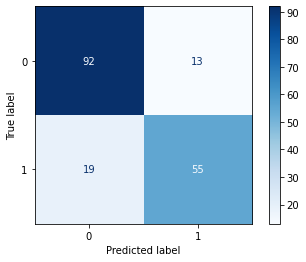

In [37]:
plot_confusion_matrix(rfc, X_test_trans, y_test, cmap=plt.cm.Blues)

### Optimization with Grid Search

In [51]:
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [53]:
# create the default model
rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train_trans, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.6min finished


In [54]:
grid_result.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=2000, random_state=42)

In [55]:
grid_result.best_params_

{'max_depth': 20, 'n_estimators': 2000}

In [56]:
grid_result.best_score_

0.8286529801794136

In [50]:
from sklearn.model_selection import GridSearchCV

param1={'max_depth' : [10,11,13,15],'n_estimators' : [100,500,1000]}
param = dict(     
    max_depth = [n for n in range(5, 15)],     
    min_samples_split = [n for n in range(2, 6)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [50,100],
    #criterion = ['gini','entropy']    
)
grid_search = GridSearchCV(RandomForestClassifier(), param, cv=7)
grid_search.fit(X_train_trans, y_train)
print("Best parameters {}".format(grid_search.best_params_))
print("Best score {:.4f}".format(grid_search.best_score_))
result = grid_search.predict(X_test_trans)
print_metrics(y_test,result)

Best parameters {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best score 0.7022


NameError: name 'print_metrics' is not defined

In [40]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(X_train_trans, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [44]:
rfc_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [45]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42) 
base_model.fit(X_train_trans, y_train)
base_accuracy = evaluate(base_model, X_test_trans, y_test)

best_random = rfc_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_trans, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.1620 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.1844 degrees.
Accuracy = -inf%.
Improvement of nan%.


<ipython-input-45-49e527e52a73>:19: RuntimeWarning: invalid value encountered in double_scalars
  print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


In [47]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
 'n_estimators': [200,300,400],
 'min_samples_split': [4,5,6],
 'min_samples_leaf': [1,2,3],
 'max_features': ['sqrt'],
 'max_depth': [10,20,30],
 'bootstrap': [True]
}
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [48]:
# Fit the grid search to the data
grid_search.fit(X_train_trans, y_train)
grid_search.best_params_


best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_trans, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.2min finished


Model Performance
Average Error: 0.1732 degrees.
Accuracy = -inf%.
Improvement of nan%.


<ipython-input-48-9ea0871a7558>:9: RuntimeWarning: invalid value encountered in double_scalars
  print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
